# k-Nearest Neighbor Classification Example

An example application of kNN (k-Nearest Neighbor) Classification

kNN is a simple algorithm with the following two characteristics:
- **Non-parametric:** it is not based on any mathematical assumptions (e.g. Naive Bayes assumes each feature is independent to others). Hence, it should be suitable for any data.
- **Lazy:** The training stage does not really train anything. Instead, it just copies the whole dataset. When you run the testing stage, it searches the nearest k elements in the copied dataset. 

Advantages:
- Easy to understand and implement
- Only need to tune one parameter (k) until it reaches satisfactory result. 

Disadvantages:
- When the number of features (i.e. dimensionality) is huge, it takes forever to compute, and it will be less accurate (unless you have even more data). This is called the **Curse of Dimensionality**.

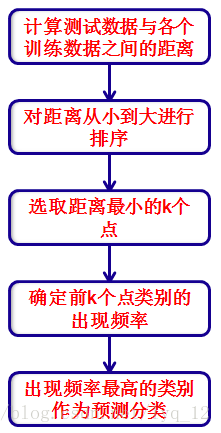

**Reference:**
- https://blog.csdn.net/lyq_12/article/details/81041007
- https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms


In [1]:
# Load example dataset from scikit-learn dataset library
from sklearn import datasets
wine = datasets.load_wine()


In [2]:
# print the wine feature names
print(wine.feature_names)

# print the wine class names
print(wine.target_names)

# print the first 5 wine data
print(wine.data[0:5])

# print the first 5 iris labels / results (0:class_0, 1:class_1, 2:class_2)
print(wine.target[0:5])

# Extra: print data(feature) shape
print(wine.data.shape)


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]
(178, 13)


In [3]:
# Normalize data before continue (not necessary)
from sklearn import preprocessing
X_normalized = preprocessing.normalize(wine.data, norm='l2') # L1, L2, or max normalization technique

# Split dataset into two sets: training set & testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_normalized, wine.target, test_size=0.3) # 70% training and 30% test


In [4]:
# Import kNN Classifier from neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Create kNN Classifier
knnc = KNeighborsClassifier(n_neighbors=6) # k=6 is adjsutable

# Train the model using the training sets
knnc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knnc.predict(X_test)


In [5]:
# Evalaute accuracy with scikit-learn metrics modules
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.7777777777777778
